1. Import all needed tools
2. Define all cleaned datas.
3. Goal: Seeing the counts, basic statisctics and basic graphs to create relationship between datasets and datas

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine, types
from sqlalchemy import text 

In [ ]:
s_1 = pd.read_csv('../data/Staging/staging_world_marriage.csv')
c_2 = pd.read_csv('../data/Cleaned/cleaned_countries_1970_2025_un.csv')
c_3 = pd.read_csv('../data/Cleaned/cleaned_marital_status_by_age_un.csv')
c_4 = pd.read_csv('../data/Cleaned/cleaned_fertility_indicators_un.csv')
c_5 = pd.read_csv('../data/Cleaned/cleaned_ever_married_un.csv')
c_6 = pd.read_csv('../data/Cleaned/cleaned_currently_married_un.csv')
c_7 = pd.read_csv('../data/Cleaned/cleaned_regions_un.csv')
c_8 = pd.read_csv('../data/Cleaned/cleaned_unpopulation_dataportal.csv')
c_9 = pd.read_csv('../data/Cleaned/cleaned_age_at_marriage_women.csv')
c_10 = pd.read_csv('../data/Cleaned/cleaned_marriage-rate-per-1000-inhabitants.csv')
c_11 = pd.read_csv('../data/Cleaned/cleaned_marriage-rates-in-1990-vs-2020.csv')
c_12 = pd.read_csv('../data/Cleaned/cleaned_share-of-births-outside-marriage.csv')
c_13 = pd.read_csv('../data/Cleaned/cleaned_share-of-men-in-england-and-wales-who-have-ever-married-by-age.csv')
c_14 = pd.read_csv('../data/Cleaned/cleaned_share-of-women-in-england-and-wales-who-have-ever-married-by-age.csv')
c_15 = pd.read_csv('../data/Cleaned/cleaned_share-of-single-parent-households.csv')




In [43]:
print(s_1.info())
print(s_1.describe())
print(s_1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266249 entries, 0 to 266248
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country                     266249 non-null  object
 1   age_group                   266249 non-null  object
 2   sex                         266249 non-null  object
 3   marital_status              266249 non-null  object
 4   data_process                266249 non-null  object
 5   data_collection_start_year  266249 non-null  int64 
 6   data_collection_end_year    266249 non-null  int64 
 7   data_source                 266249 non-null  object
dtypes: int64(2), object(6)
memory usage: 16.3+ MB
None
       data_collection_start_year  data_collection_end_year
count               266249.000000             266249.000000
mean                  1997.094059               1997.191467
std                     14.187404                 14.227446
min                   19

<Figure size 1200x800 with 0 Axes>

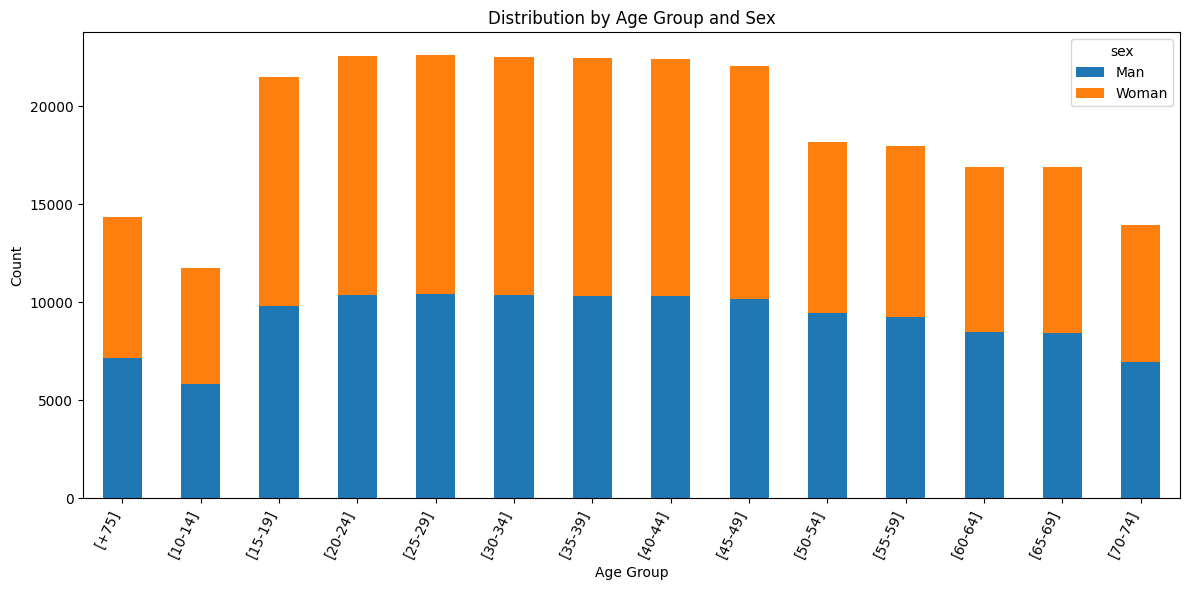

In [44]:
plt.figure(figsize=(12,8))
age_sex_counts = s_1.groupby(['age_group', 'sex']).size().unstack()
age_sex_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()

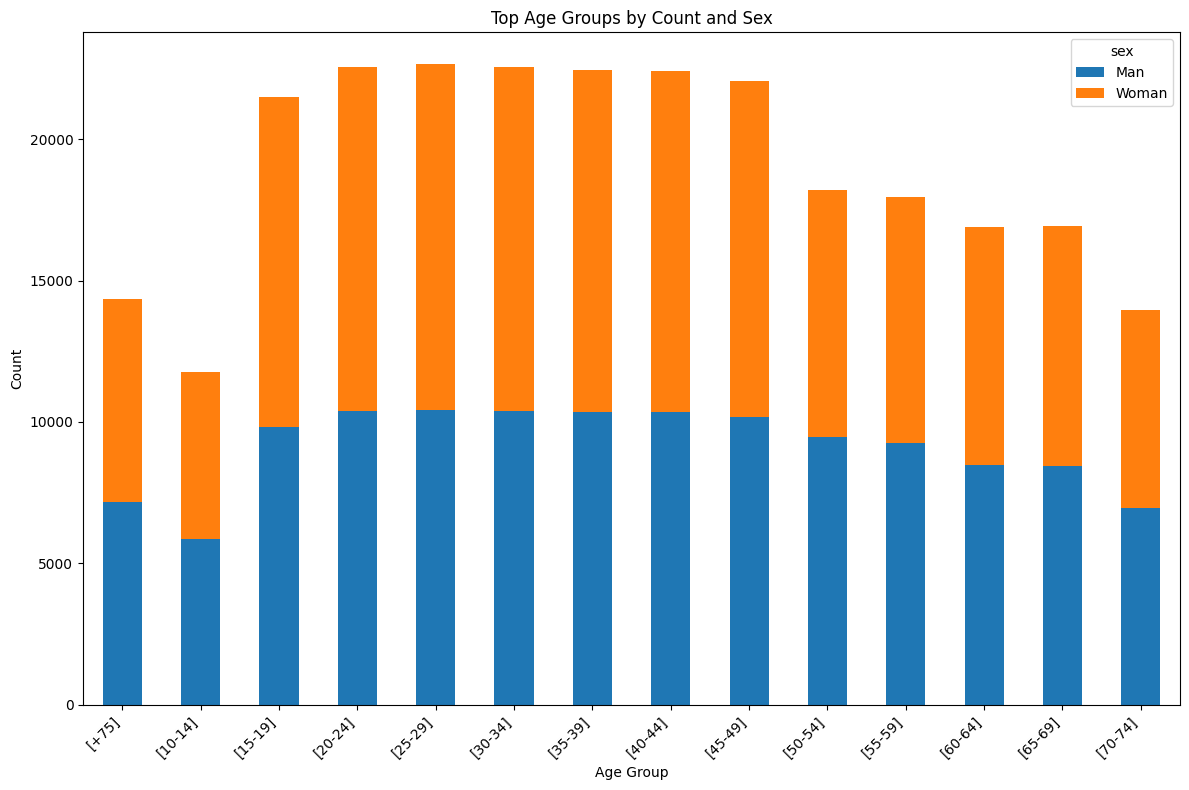

In [45]:
top_age_groups = s_1['age_group'].value_counts().nlargest(14).index
age_sex_counts_top = s_1[s_1['age_group'].isin(top_age_groups)].groupby(['age_group', 'sex']).size().unstack()
age_sex_counts_top.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Top Age Groups by Count and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

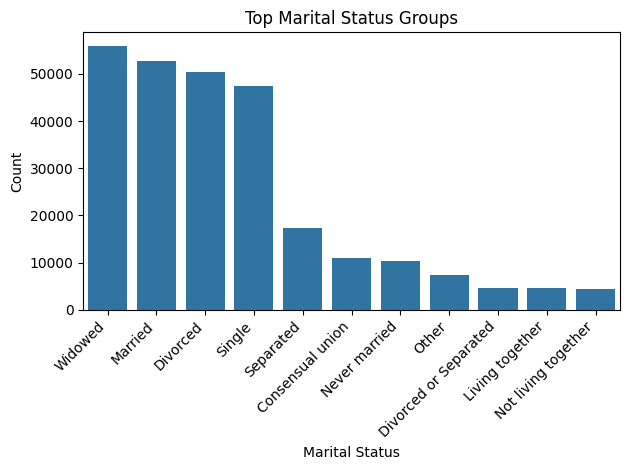

In [46]:
marital_counts = s_1['marital_status'].value_counts()
top_n = 10
top_categories = marital_counts.index[:top_n]
s_1['marital_status_grouped'] = s_1['marital_status'].apply(lambda x: x if x in top_categories else 'Other')

grouped_counts = s_1['marital_status_grouped'].value_counts()
sns.barplot(x=grouped_counts.index, y=grouped_counts.values)
plt.title('Top Marital Status Groups')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

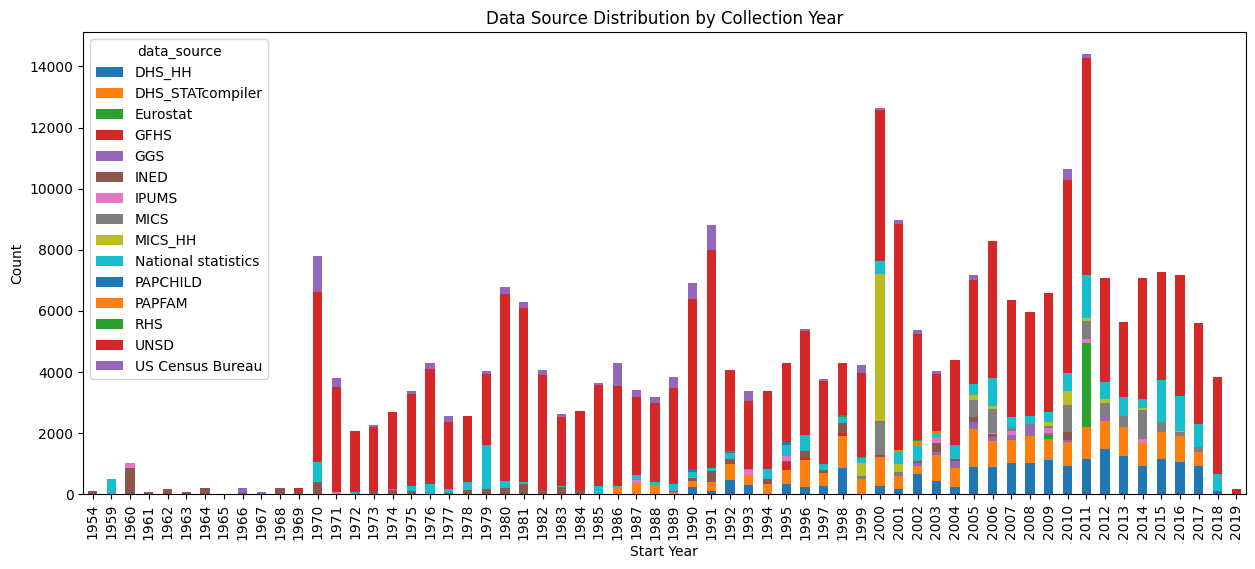

In [47]:
source_year_counts = s_1.groupby(['data_collection_start_year', 'data_source']).size().unstack(fill_value=0)
source_year_counts.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Data Source Distribution by Collection Year')
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1047 non-null   object 
 1   code                                 1047 non-null   object 
 2   year                                 1047 non-null   int64  
 3   mean_age_of_women_at_first_marriage  1047 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.8+ KB
None
              year  mean_age_of_women_at_first_marriage
count  1047.000000                          1047.000000
mean   2005.023878                            27.683043
std       8.689371                             2.532542
min    1990.000000                            20.000000
25%    1998.000000                            25.900000
50%    2005.000000                            27.700000
75%    2012.000000                    

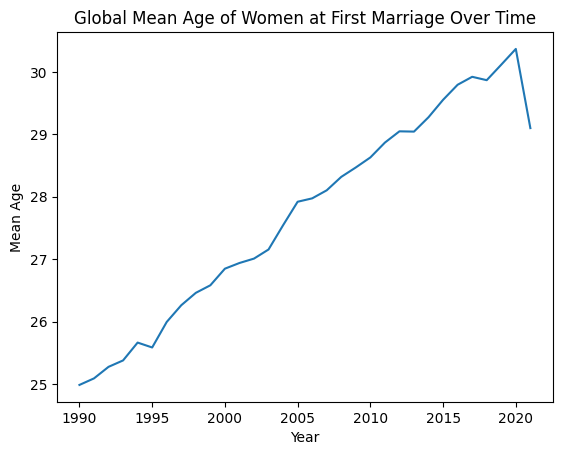

In [50]:
# EDA & Visualization
print(c_11.info())
print(c_11.describe())
print(c_11.head())

# Global mean age over time
yearly_age = c_11.groupby('year')['mean_age_of_women_at_first_marriage'].mean().reset_index()
sns.lineplot(data=yearly_age, x='year', y='mean_age_of_women_at_first_marriage')
plt.title('Global Mean Age of Women at First Marriage Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.show()